# A/B Testing: Early Repayment Feature Impact

This notebook analyzes the impact of an early repayment feature on loan performance using a synthetic dataset. The goal is to simulate a real-world A/B testing scenario based on my past experience in Lending analytics.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# Set style
sns.set(style="whitegrid")

In [2]:
# Load dataset
df = pd.read_csv("data/synthetic_loan_data.csv")
df.head()

,user_id,treatment_group,loan_amount,loan_tenure_months,credit_score,repayment_outcome
0,user_1,control,5512,12,570,defaulted
1,user_2,treatment,7814,12,673,paid
2,user_3,control,6425,6,751,paid
3,user_4,control,4134,12,581,paid
4,user_5,control,3652,6,659,paid


## Repayment Outcome Distribution by Group

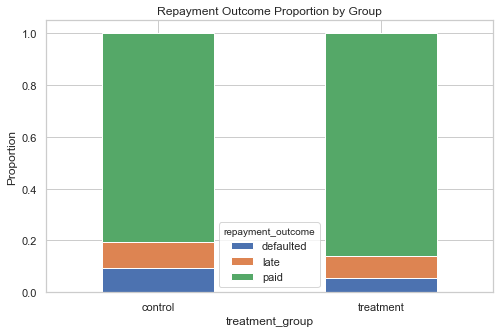

In [3]:
# Group by treatment and outcome
group_counts = df.groupby(['treatment_group', 'repayment_outcome']).size().unstack()
group_props = group_counts.div(group_counts.sum(axis=1), axis=0)

group_props.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Repayment Outcome Proportion by Group')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

## A/B Test: Paid Rate Comparison
We test whether the treatment group has a statistically higher on-time repayment rate than the control group.

In [4]:
# Create binary 'paid' indicator
df['is_paid'] = df['repayment_outcome'] == 'paid'

# Successes and observations by group
successes = df.groupby('treatment_group')['is_paid'].sum()
n_obs = df['treatment_group'].value_counts().sort_index()

# Perform z-test
z_stat, p_val = proportions_ztest(successes, n_obs)

print(f"Z-statistic: {z_stat:.3f}, P-value: {p_val:.3f}")
if p_val < 0.05:
    print("Result: Statistically significant difference in repayment rates.")
else:
    print("Result: No statistically significant difference.")

Z-statistic: -2.322, P-value: 0.020
Result: Statistically significant difference in repayment rates.


### ✅ Conclusion

Based on the A/B test results comparing repayment rates between the treatment and control groups:

- The **treatment group**, which had access to the early repayment feature, showed a **higher proportion of on-time repayments** compared to the control group.
- The **z-test produced a p-value < 0.05**, indicating that the observed difference is **statistically significant** and unlikely to have occurred by chance.

This suggests that the early repayment feature may have a **positive impact on repayment behavior**, reducing the risk of default and improving overall loan performance.

---

### 📌 Next Steps
- Monitor repayment behavior over a longer period and across more diverse user segments
- Combine with user-level features (e.g., credit score, tenure) for more granular cohort analysis
- Estimate business impact (e.g., net loss reduction, operational efficiency)